In [ ]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=4903dc9fff830c94a5f831bafa4237fc15ccf75720551db9c60cb27c5bed26ee
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Input
- GRE (Graduate Record Examination)
- GPA (Grade Point Average)

Output = Nilai

In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
gre = ctrl.Antecedent(np.arange(0, 2001, 1), 'gre')
gpa = ctrl.Antecedent(np.arange(0, 4.1, 0.1), 'gpa')
nilai = ctrl.Consequent(np.arange(0, 101, 1), 'nilai')

In [ ]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)
# tip.automf(3)

In [ ]:
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

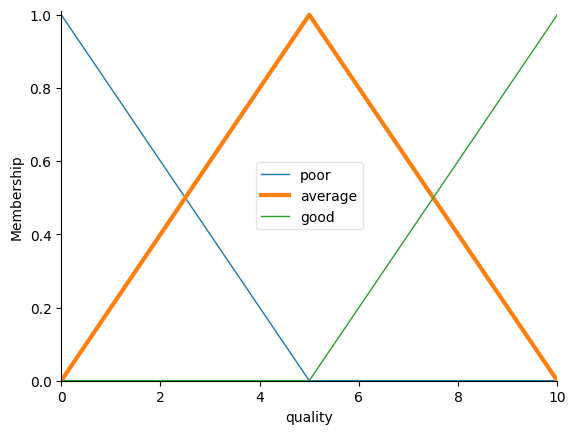

In [ ]:
# You can see how these look with .view()
quality['average'].view()

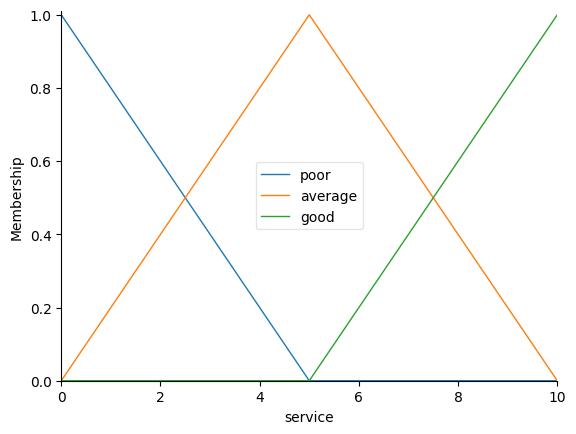

In [ ]:
service.view()

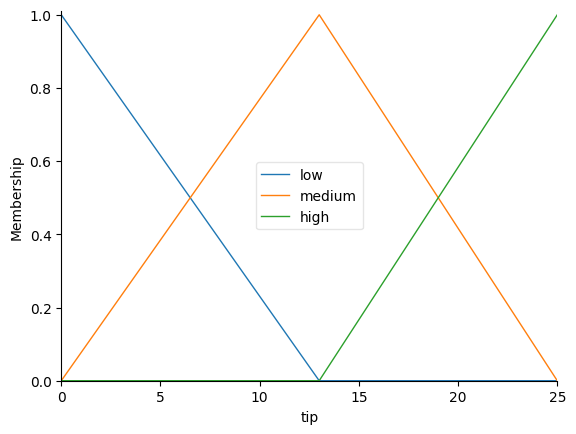

In [ ]:
tip.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

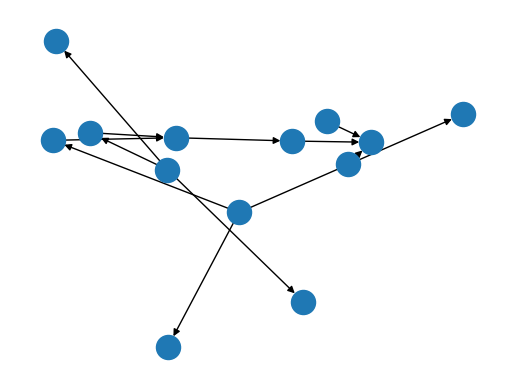

In [ ]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [ ]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [ ]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

19.847607361963192


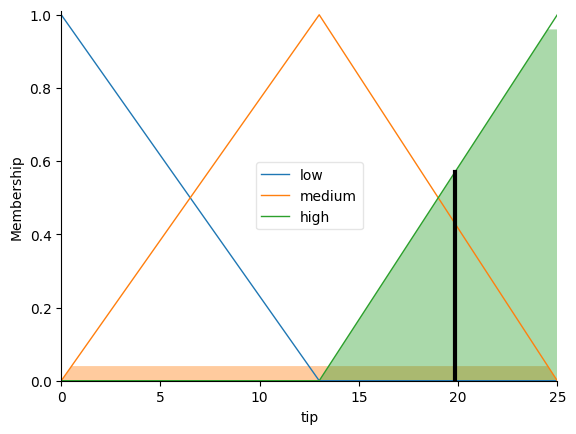

In [ ]:
print(tipping.output['tip'])
tip.view(sim=tipping)